<a href="https://colab.research.google.com/github/thiagobg/bradr/blob/master/techsus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ffn

In [0]:
import ffn as f

In [0]:
%matplotlib inline

In [0]:
#@title Date Range

date_start = '2015-01-01'  #@param {type: "date"}
date_end = '2019-07-01'  #@param {type: "date"}
#@markdown 

In [0]:
#@title Yahoo Finance Ticker

ticker = 'GOOG, AMZN, AAPL, MSFT' #@param {type:"string"}
#@markdown Comma Separated Values

In [6]:
data = f.get('GOOG, AMZN, AAPL, MSFT', start=date_start, end=date_end)
print(data.head())

                  goog        amzn        aapl       msft
Date                                                     
2015-01-02  523.373108  308.519989  101.138702  42.262299
2015-01-05  512.463013  302.190002   98.289474  41.873657
2015-01-06  500.585632  295.290009   98.298729  41.259060
2015-01-07  499.727997  298.420013   99.677094  41.783279
2015-01-08  501.303680  300.459991  103.506897  43.012459


In [0]:
returns = data.to_log_returns().dropna()

In [8]:
print(returns.head())

                goog      amzn      aapl      msft
Date                                              
2015-01-05 -0.021066 -0.020731 -0.028576 -0.009238
2015-01-06 -0.023450 -0.023098  0.000094 -0.014786
2015-01-07 -0.001715  0.010544  0.013925  0.012626
2015-01-08  0.003148  0.006813  0.037702  0.028994
2015-01-09 -0.013035 -0.011818  0.001072 -0.008441


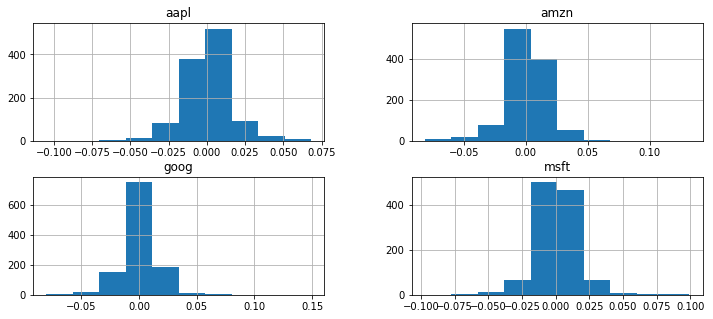

In [9]:
ax = returns.hist(figsize=(12, 5))

In [10]:
returns.corr().as_format('.2f')

,goog,amzn,aapl,msft
goog,1.00,0.66,0.52,0.67
amzn,0.66,1.00,0.50,0.62
aapl,0.52,0.50,1.00,0.58
msft,0.67,0.62,0.58,1.00


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

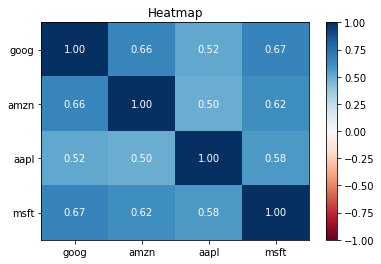

In [11]:
returns.plot_corr_heatmap()

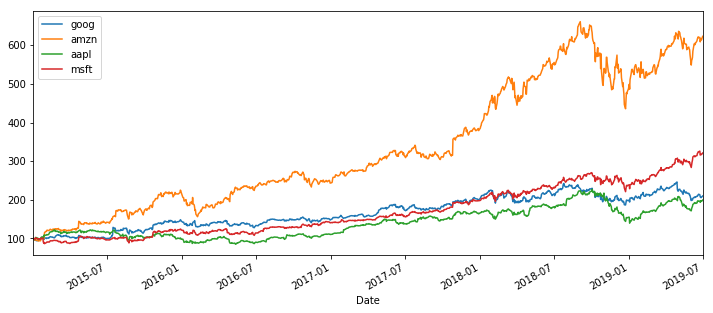

In [12]:
ax = data.rebase().plot(figsize=(12,5))

In [13]:
perf = data.calc_stats()

/usr/local/lib/python3.6/dist-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


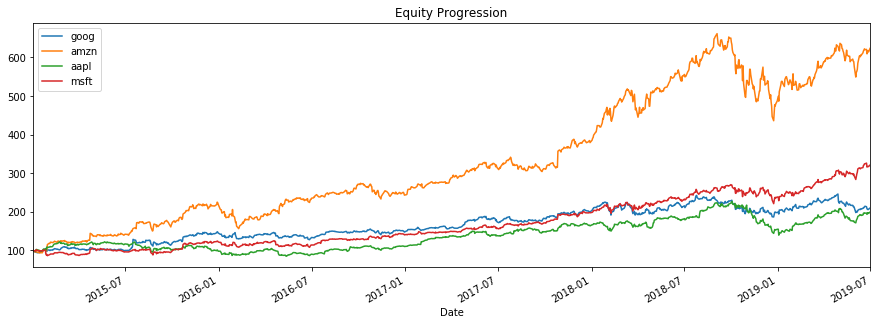

In [14]:
perf.plot()

In [15]:
print (perf.display())

Stat                 goog        amzn        aapl        msft
-------------------  ----------  ----------  ----------  ----------
Start                2015-01-02  2015-01-02  2015-01-02  2015-01-02
End                  2019-07-01  2019-07-01  2019-07-01  2019-07-01
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         109.78%     523.04%     99.28%      221.04%
Daily Sharpe         0.80        1.50        0.74        1.21
Daily Sortino        1.37        2.71        1.20        2.05
CAGR                 17.93%      50.26%      16.59%      29.64%
Max Drawdown         -23.03%     -34.10%     -38.52%     -18.23%
Calmar Ratio         0.78        1.47        0.43        1.63

MTD                  1.58%       1.51%       1.83%       1.28%
3m                   -8.08%      5.95%       5.80%       14.42%
6m                   6.02%       27.98%      28.82%      34.65%
YTD                  6.02%       27.98%      28.82%      34.65%
1Y                   -1.59%      1

In [0]:
import pandas as pd

In [0]:
import pandas_profiling as pf

In [18]:
pf.ProfileReport(data)

Number of variables,5
Number of observations,1131
Total Missing (%),0.0%
Total size in memory,44.3 KiB
Average record size in memory,40.1 B
Numeric,1
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,3
